In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import statistics
from statsmodels.tsa.stattools import adfuller, kpss, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [125]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [3]:
mape_list = []
rmse_list = []
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mape_list.append(mape)
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    rmse_list.append(rmse)
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

In [4]:
def train_arima(df, index=0, max_m=2):
    train = df[:-10]
    test = df[-10:]
    best_model = pm.auto_arima(train.values, start_p=0, start_q=0,
                               test='adf',       # use adftest to find optimal 'd'
                               max_p=3, max_q=3, # maximum p and q
                               m=1,              # frequency of series
                               d=None,           # let model determine 'd'
                               seasonal=True,   # Seasonality
                               start_P=0, 
                               D=1, 
                               trace=False,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
    for i in range(2, max_m):
        model = pm.auto_arima(train.values, start_p=0, start_q=0,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=i,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # Seasonality
                          start_P=0, 
                          D=1, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        
        # Find the best model with MSE
        if np.mean((model.predict(n_periods=test.shape[0]) - test.values)**2) < np.mean((best_model.predict(n_periods=test.shape[0]) - test.values)**2):
            best_model = model
#     print("Data " + str(index))
#     print(forecast_accuracy(model.predict(n_periods=test.shape[0]), test.values))
    forecast_accuracy(best_model.predict(n_periods=test.shape[0]), test.values)
#     print("\n")

In [5]:
def learn(all_num, sample_size, ts, max_m=2):
    num = [str(i) for i in range(all_num)]
    p1 = [read_csv('ics_data_preprocessed/07_Smart_Meter_65/Q1/' + str(ts) + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]

    p1 = [prepare_data(df, sample_size) for df in p1]
    p1 = sum(p1, [])
    
    if not p1:
        print("Not enough data")
        return
    else:
        print("Data count: ", len(p1))

    for df in p1[:100]:
        train_arima(df, max_m=max_m)

In [6]:
def prepare_data(df, num_elements=50):
    new_data = []
    length = df.shape[0]
    current_index = 0
    step = int(0.2 * num_elements)
    while(current_index <= length - num_elements):
        new_data.append(df[current_index:current_index+num_elements])
        current_index += step
    return new_data

In [12]:
learn(22, 50, 1000, 3)
rmse_list = [el for ind, el in enumerate(rmse_list) if mape_list[ind] < 1]
mape_list = [el for ind, el in enumerate(mape_list) if el < 1] # удалим куски датасетов, на которых алгоритм не сошелся

print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  225


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/

0.005132942445627751
5.916001579921244


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [13]:
learn(22, 400, 1000, 3)
rmse_list = [el for ind, el in enumerate(rmse_list) if mape_list[ind] < 1]
mape_list = [el for ind, el in enumerate(mape_list) if el < 1] # удалим куски датасетов, на которых алгоритм не сошелся

print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  12
0.06519996392354961
13.127669669295415


In [14]:
learn(141, 50, 1500, 3)
rmse_list = [el for ind, el in enumerate(rmse_list) if mape_list[ind] < 1]
mape_list = [el for ind, el in enumerate(mape_list) if el < 1] # удалим куски датасетов, на которых алгоритм не сошелся

print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  2079


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/

0.06353383996625687
28.97930888745361


In [15]:
learn(902, 50, 2000, 3)
rmse_list = [el for ind, el in enumerate(rmse_list) if mape_list[ind] < 1]
mape_list = [el for ind, el in enumerate(mape_list) if el < 1] # удалим куски датасетов, на которых алгоритм не сошелся

print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  50274


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/

0.012247636049826817
2.439405556656025


In [16]:
learn(19, 100, 5000, 3)
rmse_list = [el for ind, el in enumerate(rmse_list) if mape_list[ind] < 1]
mape_list = [el for ind, el in enumerate(mape_list) if el < 1] # удалим куски датасетов, на которых алгоритм не сошелся

print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  2273


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/

0.019593222418348797
13.953829215958006


In [17]:
learn(20, 450, 15000, 3)
rmse_list = [el for ind, el in enumerate(rmse_list) if mape_list[ind] < 1]
mape_list = [el for ind, el in enumerate(mape_list) if el < 1] # удалим куски датасетов, на которых алгоритм не сошелся

print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  10
0.02674956521174523
11.697099321165933


In [134]:
num = [str(i) for i in range(19)]
p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/' + '1000' + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
p1 = [prepare_data(df, 100) for df in p1]
p1 = sum(p1, [])

df = p1[10]
max_m = 3

train = df[:-10]
test = df[-10:]
best_model = pm.auto_arima(train.values, start_p=0, start_q=0,
                           test='adf',       # use adftest to find optimal 'd'
                           max_p=3, max_q=3, # maximum p and q
                           m=1,              # frequency of series
                           d=None,           # let model determine 'd'
                           seasonal=True,   # Seasonality
                           start_P=0, 
                           D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
for i in range(2, max_m):
    model = pm.auto_arima(train.values, start_p=0, start_q=0,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=i,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # Seasonality
                          start_P=0, 
                          D=1, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        
        # Find the best model with MSE
    if np.mean((model.predict(n_periods=test.shape[0]) - test.values)**2) < np.mean((best_model.predict(n_periods=test.shape[0]) - test.values)**2):
        best_model = model
        
forecast_accuracy(best_model.predict(n_periods=test.shape[0]), test.values)

{'mape': 0.016624708834412475,
 'me': 5.904008383473905,
 'mae': 6.705724360004848,
 'mpe': 0.014676145262371404,
 'rmse': 8.758694069801193,
 'corr': -0.7873929462954853}

In [135]:
preds, conf_int = best_model.predict(n_periods=test.shape[0], return_conf_int=True, alpha=0.1)

In [136]:
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

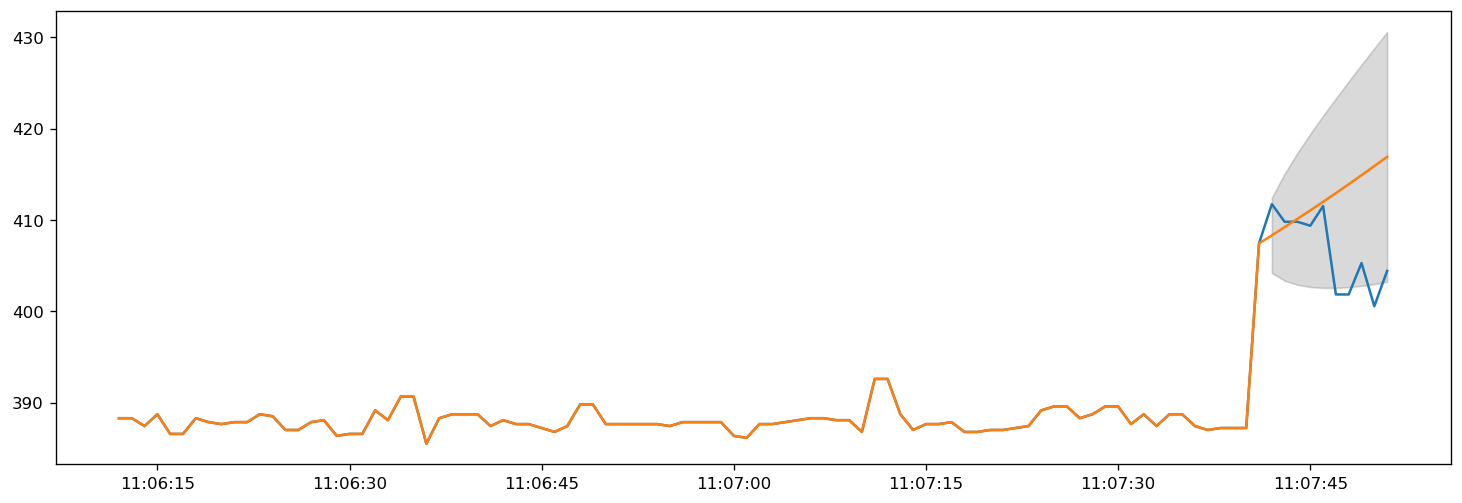

In [137]:
plt.plot(df)
plt.plot(train.append(pd.Series(best_model.predict(n_periods=test.shape[0]), index=test.index)))
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

In [182]:
num = [str(i) for i in range(19)]
p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/' + '2000' + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
p1 = [prepare_data(df, 200) for df in p1]
p1 = sum(p1, [])

df = p1[11]
max_m = 5

train = df[:-10]
test = df[-10:]
best_model = pm.auto_arima(train.values, start_p=0, start_q=0,
                           test='adf',       # use adftest to find optimal 'd'
                           max_p=3, max_q=3, # maximum p and q
                           m=1,              # frequency of series
                           d=None,           # let model determine 'd'
                           seasonal=True,   # Seasonality
                           start_P=0, 
                           D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
for i in range(2, max_m):
    model = pm.auto_arima(train.values, start_p=0, start_q=0,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=i,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # Seasonality
                          start_P=0, 
                          D=1, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        
        # Find the best model with MSE
    if np.mean((model.predict(n_periods=test.shape[0]) - test.values)**2) < np.mean((best_model.predict(n_periods=test.shape[0]) - test.values)**2):
        best_model = model
        
forecast_accuracy(best_model.predict(n_periods=test.shape[0]), test.values)

{'mape': 0.00787728467421719,
 'me': 0.40966307668878416,
 'mae': 1.8969388887565883,
 'mpe': 0.001794873006710759,
 'rmse': 2.414269815108818,
 'corr': 0.03835797772982613}

In [183]:
preds, conf_int = best_model.predict(n_periods=test.shape[0], return_conf_int=True, alpha=0.3)

In [184]:
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

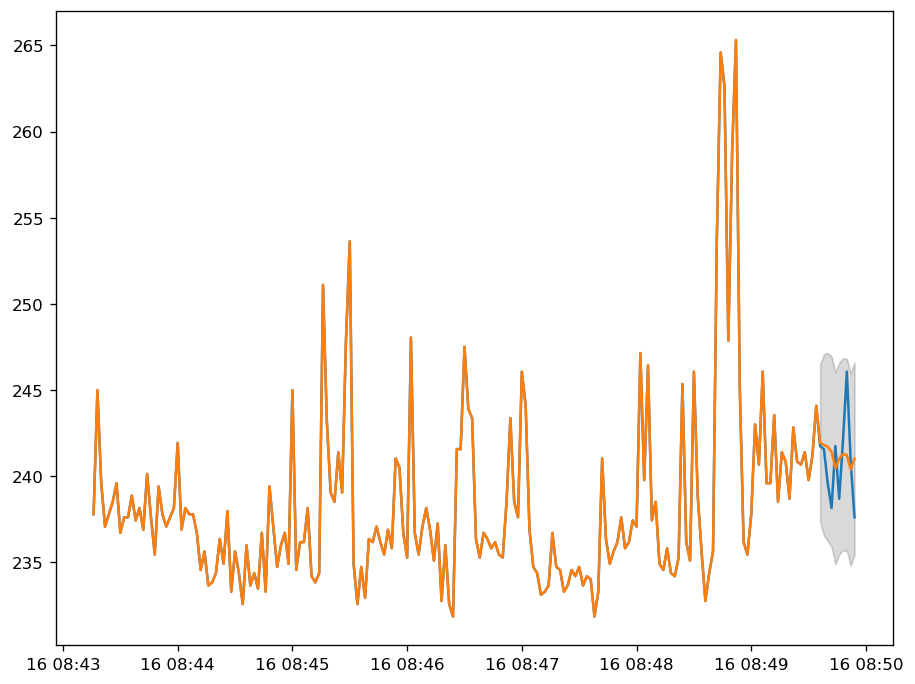

In [185]:
plt.plot(df)
plt.plot(train.append(pd.Series(best_model.predict(n_periods=test.shape[0]), index=test.index)))
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

In [205]:
num = [str(i) for i in range(19)]
p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/' + '5000' + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
p1 = [prepare_data(df, 1000) for df in p1]
p1 = sum(p1, [])

df = p1[0]
max_m = 5

train = df[:-10]
test = df[-10:]
best_model = pm.auto_arima(train.values, start_p=0, start_q=0,
                           test='adf',       # use adftest to find optimal 'd'
                           max_p=3, max_q=3, # maximum p and q
                           m=1,              # frequency of series
                           d=None,           # let model determine 'd'
                           seasonal=True,   # Seasonality
                           start_P=0, 
                           D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
for i in range(2, max_m):
    model = pm.auto_arima(train.values, start_p=0, start_q=0,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=i,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # Seasonality
                          start_P=0, 
                          D=1, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        
        # Find the best model with MSE
    if np.mean((model.predict(n_periods=test.shape[0]) - test.values)**2) < np.mean((best_model.predict(n_periods=test.shape[0]) - test.values)**2):
        best_model = model
        
forecast_accuracy(best_model.predict(n_periods=test.shape[0]), test.values)

{'mape': 0.007052681785909306,
 'me': -4.607051040709246,
 'mae': 4.607051040709246,
 'mpe': -0.007052681785909306,
 'rmse': 5.714429105859197,
 'corr': -0.3416074989948188}

In [206]:
preds, conf_int = best_model.predict(n_periods=test.shape[0], return_conf_int=True, alpha=0.95)

In [207]:
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

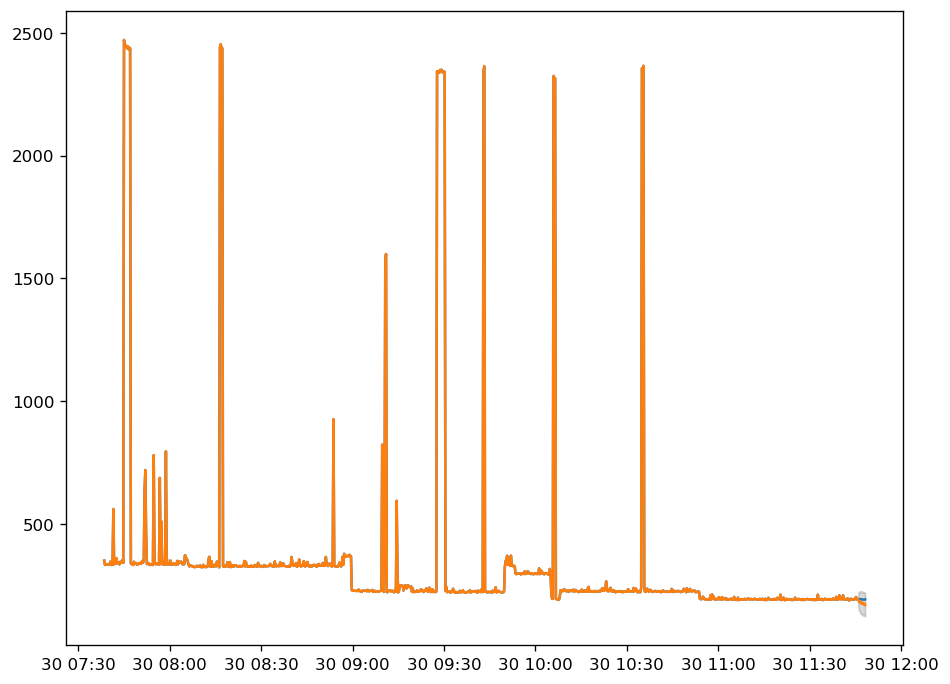

In [218]:
plt.plot(df)
plt.plot(train.append(pd.Series(best_model.predict(n_periods=test.shape[0]), index=test.index)))
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

In [130]:
num = [str(i) for i in range(19)]
p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/' + '15000' + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
p1 = [prepare_data(df, 1000) for df in p1]
p1 = sum(p1, [])

df = p1[1]
max_m = 3

train = df[:-10]
test = df[-10:]
best_model = pm.auto_arima(train.values, start_p=0, start_q=0,
                           test='adf',       # use adftest to find optimal 'd'
                           max_p=3, max_q=3, # maximum p and q
                           m=1,              # frequency of series
                           d=None,           # let model determine 'd'
                           seasonal=True,   # Seasonality
                           start_P=0, 
                           D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
for i in range(2, max_m):
    model = pm.auto_arima(train.values, start_p=0, start_q=0,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=i,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # Seasonality
                          start_P=0, 
                          D=1, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        
        # Find the best model with MSE
    if np.mean((model.predict(n_periods=test.shape[0]) - test.values)**2) < np.mean((best_model.predict(n_periods=test.shape[0]) - test.values)**2):
        best_model = model
        
forecast_accuracy(best_model.predict(n_periods=test.shape[0]), test.values)

{'mape': 0.07065336454643786,
 'me': -13.570173739866657,
 'mae': 13.665150949506147,
 'mpe': -0.07015978414036021,
 'rmse': 14.939684323398373,
 'corr': 0.11831045352421603}

In [131]:
preds, conf_int = best_model.predict(n_periods=test.shape[0], return_conf_int=True, alpha=0.9)

In [132]:
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

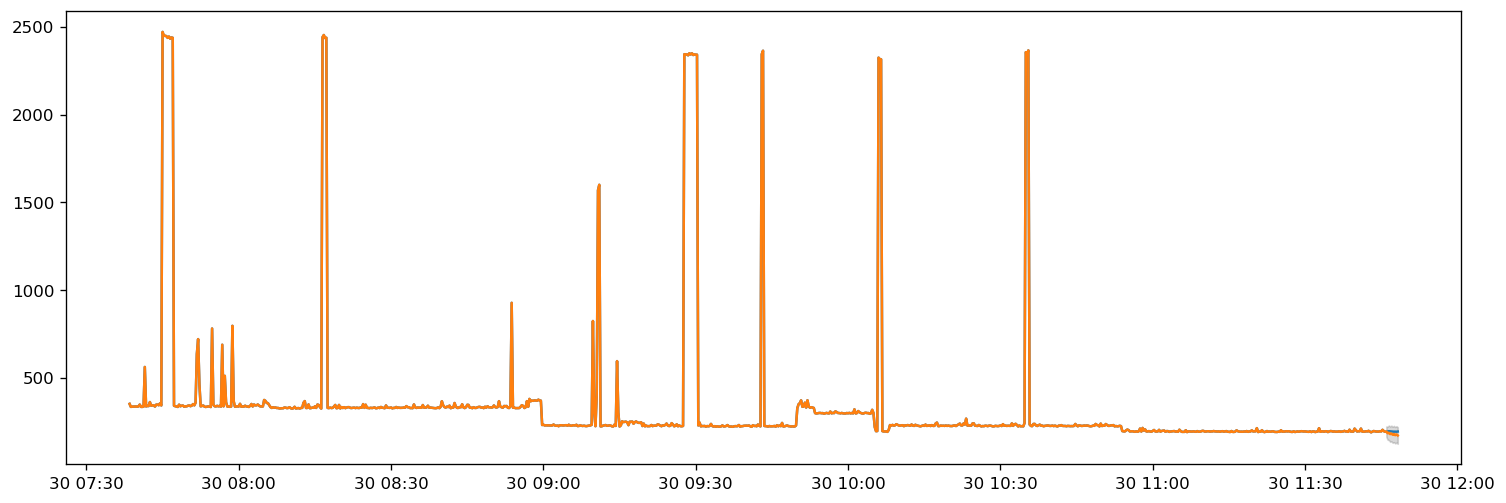

In [133]:
plt.plot(df)
plt.plot(train.append(pd.Series(best_model.predict(n_periods=test.shape[0]), index=test.index)))
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

In [127]:
num = [str(i) for i in range(19)]
p1 = [read_csv('ics_data_preprocessed/07_Smart_Meter_65/P1/' + '2000' + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
p1 = [prepare_data(df, 100) for df in p1]
p1 = sum(p1, [])

df = p1[11]
max_m = 3

train = df[:-10]
test = df[-10:]
best_model = pm.auto_arima(train.values, start_p=0, start_q=0,
                           test='adf',       # use adftest to find optimal 'd'
                           max_p=3, max_q=3, # maximum p and q
                           m=1,              # frequency of series
                           d=None,           # let model determine 'd'
                           seasonal=True,   # Seasonality
                           start_P=0, 
                           D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
for i in range(2, max_m):
    model = pm.auto_arima(train.values, start_p=0, start_q=0,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=i,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # Seasonality
                          start_P=0, 
                          D=1, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        
        # Find the best model with MSE
    if np.mean((model.predict(n_periods=test.shape[0]) - test.values)**2) < np.mean((best_model.predict(n_periods=test.shape[0]) - test.values)**2):
        best_model = model
        
forecast_accuracy(best_model.predict(n_periods=test.shape[0]), test.values)

{'mape': 0.002655549451463126,
 'me': 1.1799832550451697,
 'mae': 1.1799832550451697,
 'mpe': 0.002655549451463126,
 'rmse': 1.3660012692845163,
 'corr': -0.792061094652599}

In [128]:
preds, conf_int = best_model.predict(n_periods=test.shape[0], return_conf_int=True, alpha=0.6)
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

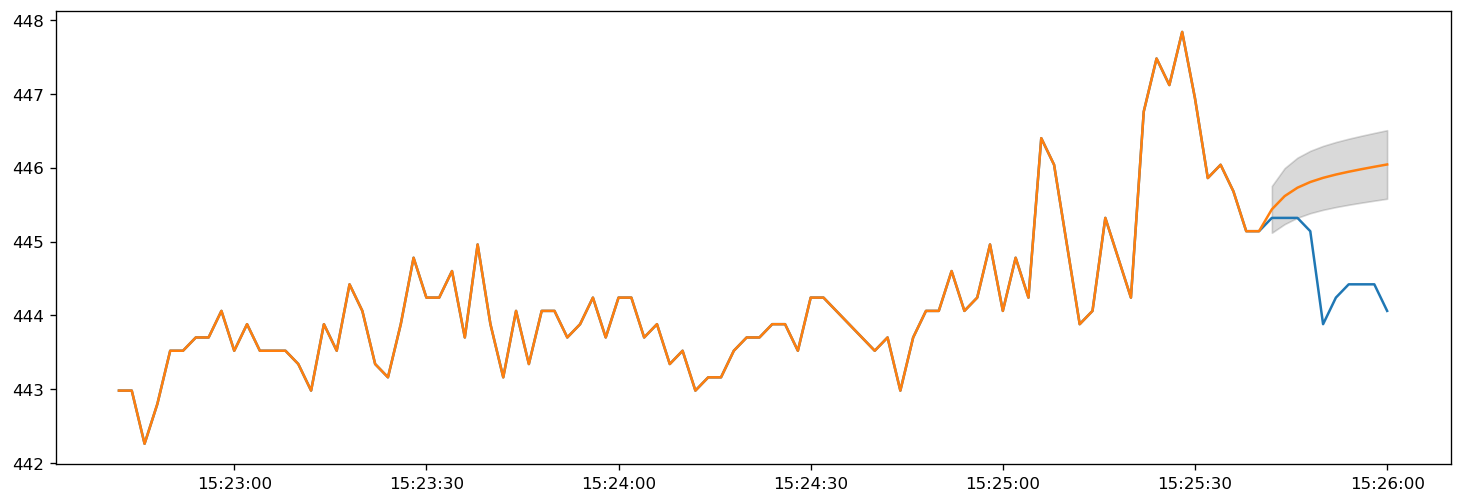

In [129]:
plt.plot(df)
plt.plot(train.append(pd.Series(best_model.predict(n_periods=test.shape[0]), index=test.index)))
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

In [117]:
num = [str(i) for i in range(19)]
p1 = [read_csv('ics_data_preprocessed/07_Smart_Meter_65/P1/' + '1000' + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
p1 = [prepare_data(df, 300) for df in p1]
p1 = sum(p1, [])

df = p1[6]
max_m = 3

train = df[:-10]
test = df[-10:]
best_model = pm.auto_arima(train.values, start_p=0, start_q=0,
                           test='adf',       # use adftest to find optimal 'd'
                           max_p=3, max_q=3, # maximum p and q
                           m=1,              # frequency of series
                           d=None,           # let model determine 'd'
                           seasonal=True,   # Seasonality
                           start_P=0, 
                           D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
for i in range(2, max_m):
    model = pm.auto_arima(train.values, start_p=0, start_q=0,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=i,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # Seasonality
                          start_P=0, 
                          D=1, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        
        # Find the best model with MSE
    if np.mean((model.predict(n_periods=test.shape[0]) - test.values)**2) < np.mean((best_model.predict(n_periods=test.shape[0]) - test.values)**2):
        best_model = model
        
forecast_accuracy(best_model.predict(n_periods=test.shape[0]), test.values)

{'mape': 0.001927841133068816,
 'me': -0.17032030066616813,
 'mae': 0.34552330695771616,
 'mpe': -0.0009466993919425481,
 'rmse': 0.4356636421500505,
 'corr': -0.15603066139813526}

In [123]:
preds, conf_int = best_model.predict(n_periods=test.shape[0], return_conf_int=True, alpha=0.6)
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

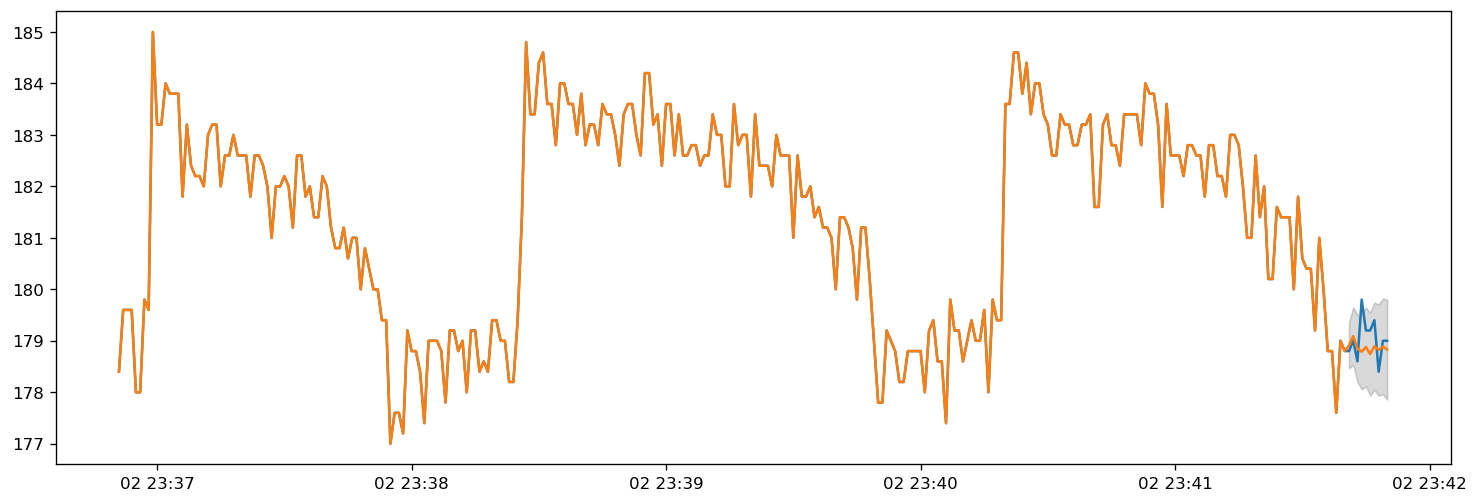

In [126]:
plt.plot(df)
plt.plot(train.append(pd.Series(best_model.predict(n_periods=test.shape[0]), index=test.index)))
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)